In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering, KMeans, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

sns.set()

Загрузка данные сета.

In [4]:
data = pd.read_csv('T10Y2Y.csv', sep=",")

Оцениваем что в дата-сете есть, и с чем прийдется иметь дело.

In [5]:
data

,DATE,T10Y2Y
0,2018-02-20,0.63
1,2018-02-21,0.68
2,2018-02-22,0.67
3,2018-02-23,0.63
4,2018-02-26,0.64
...,...,...
1299,2023-02-13,-0.8
1300,2023-02-14,-0.83
1301,2023-02-15,-0.81
1302,2023-02-16,-0.76


Cмотрим насколько однородны данные и сколько пропущенных элементов в тех или иных столбцах.

In [6]:
data.count()

DATE      1304
T10Y2Y    1304
dtype: int64

В процентном соотношении.

In [7]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print(f'{col} - {round(pct_missing * 100, 5)}     min: {data[col].min()}     max:{data[col].max()}')

DATE - 0.0     min: 2018-02-20     max:2023-02-17
T10Y2Y - 0.0     min: -0.01     max:1.59


In [8]:
data.describe()

,DATE,T10Y2Y
count,1304,1304
unique,1304,225
top,2021-07-07,.
freq,1,54


Видим появившуюся точку заменяем

In [9]:
data["T10Y2Y"] = np.where(data["T10Y2Y"] == ".", "0", data["T10Y2Y"])

C:\Users\Monya\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x26b9adb4668>,
 'caps': [<matplotlib.lines.Line2D at 0x26b9adb49b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b9adb4400>],
 'medians': [<matplotlib.lines.Line2D at 0x26b9adb4f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b9add1588>],
 'means': []}

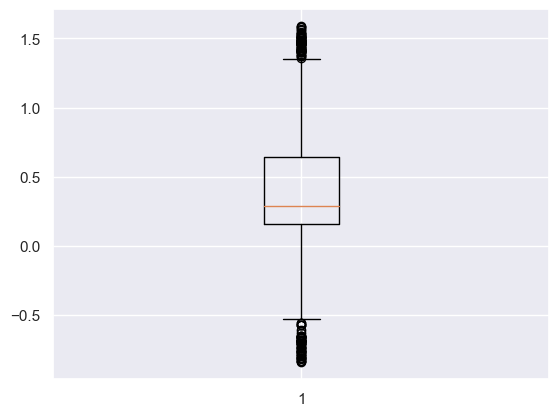

In [10]:
plt.boxplot(data["T10Y2Y"].astype(np.float))

In [ ]:
data = TimeSeries.from_dataframe(data,time_col='DATE')

In [ ]:
data.plot()

Убираем таргет из датасета

In [ ]:
data.split

In [ ]:
columns = data.columns
data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data))
data.columns = columns

Делим датасет на тренировочную и тестовую часть

In [ ]:
datasets = {"train": {}, "test": {}}
datasets["train"]["data"], datasets["test"]["data"], datasets["train"]["target"], datasets["test"][
    "target"] = train_test_split(data, target, train_size=0.9, shuffle=True)
print(datasets["train"]["data"].shape)

In [ ]:
#create list to hold Silhouette Coefficient values for each k
silhouette_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_kmeans.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

silhouette_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_agglomerative.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

silhouette_scores.clear()
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_birch.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#create list to hold Davies-Bouldin score values for each k
davies_bouldin_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_kmeans.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

davies_bouldin_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_agglomerative.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

davies_bouldin_scores.clear()
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_birch.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

In [ ]:
adjusted_rand_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    cluster_kmeans_predict = cluster_kmeans.predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_kmeans_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

adjusted_rand_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    cluster_agglomerative_predict = cluster_agglomerative.fit_predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_agglomerative_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

adjusted_rand_scores = []
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    cluster_birch_predict = cluster_birch.predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_birch_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

Из графиков метрик видно что оптимальным количеством кластеров является 4. Для моделей Agglomerative Clustering и KMeans метрики при значении кластеров 4 оптимально, для Birch приемлемы.

In [ ]:
pca = PCA().fit(data)

plt.rcParams["figure.figsize"] = (26, 10)
fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1))  #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.73, '70% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='y')
plt.show()

Мы утратим приблизительно 30% информации если уменьшим количество фичей до 8. Что мы собственно и сделаем.

In [ ]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data)
datasets_pca = {"train": {}, "test": {}}
datasets_pca["train"]["data"], datasets_pca["test"]["data"], datasets_pca["train"]["target"], datasets_pca["test"][
    "target"] = train_test_split(data_pca, target, train_size=0.9, shuffle=True)
print(datasets_pca["train"]["data"].shape)

Возьмём модель Birch и на её примере рассмотрим влияние уменьшения кол. фич на метрики.

In [ ]:
cluster_aglo = AgglomerativeClustering(n_clusters=4)

In [ ]:
cluster_aglo_pca = AgglomerativeClustering(n_clusters=4)

In [ ]:
cluster_aglo.fit(datasets["train"]["data"])

In [ ]:
cluster_aglo_pca.fit(datasets_pca["train"]["data"])

In [ ]:
print("Silhouette Coefficient for 21 features: ", silhouette_score(datasets["train"]["data"], cluster_aglo.labels_))
print("Silhouette Coefficient for 8 features: ",
      silhouette_score(datasets_pca["train"]["data"], cluster_aglo_pca.labels_))

In [ ]:
print("Davies-Bouldin score for 21 features: ", davies_bouldin_score(datasets["train"]["data"], cluster_aglo.labels_))
print("Davies-Bouldin score for 8 features: ",
      davies_bouldin_score(datasets_pca["train"]["data"], cluster_aglo_pca.labels_))

In [ ]:
cluster_agglomerative_predict = cluster_aglo.fit_predict(datasets["test"]["data"])
cluster_agglomerative_pca_predict = cluster_aglo_pca.fit_predict(datasets["test"]["data"])
print("Adjusted rand scores for 21 features: ",
      adjusted_rand_score(datasets["test"]["target"], cluster_agglomerative_predict))
print("Adjusted rand scores for 8 features: ",
      adjusted_rand_score(datasets_pca["test"]["target"], cluster_agglomerative_pca_predict))

Как видно утеря 30% данных ощутимо сказалась на метриках. Метрики Silhouette Coefficient и Davies-Bouldin показали что результаты немного улучшились, а вот метрика Adjusted rand scores показала довольно сильное падение точности результата.